# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
project_data = project_data[pd.notnull(project_data['teacher_prefix'])]

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109245, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The students in my classroom are learners, readers, writers, explorers, scientists, and mathematicians! The potential in these first graders is endless! Each day they come in grinning from ear-to-ear and ready to learn more. \r\nI choose curriculum that is real and relevant to the students, but it will also prepare them for their futures. These kids are encouraged to investigate concepts that are exciting for them and I hope we can keep this momentum going! These kids deserve the best, please help me give that to them! Thank you! :)These kits include a wide variety of science, technology, engineering, and mechanics for my students to dive into at the beginning of the year. I want them to hit the ground running this upcoming year and these kits always encourage high interest.\r\nWho wouldn't want to build their own roller coaster, design a car, or even think critically to make a bean bag bounce as far as it can go?? These kits will also shows students potential careers that they may hav

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.\r\nMy students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things. \r\nAll of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.\r\nThis will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They lea

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.  My students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things.   All of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.  This will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They learn so 

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My wonderful students are 3 4 and 5 years old We are located in a small town outside of Charlotte NC All of my 22 students are children of school district employees My students are bright energetic and they love to learn They love hands on activities that get them moving Like most preschoolers they enjoy music and creating different things All of my students come from wonderful families that are very supportive of our classroom Our parents enjoy watching their children is growth as much as we do These materials will help me teach my students all about the life cycle of a butterfly We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis After a few weeks they will emerge from the chrysalis as beautiful butterflies We already have a net for the chrysalises but we still need the caterpillars and feeding station This will be an unforgettable experience for my students My student absolutely love hands on materials They learn so much from getting to touch and man

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 109245/109245 [01:22<00:00, 1320.59it/s]


In [18]:
project_data.drop(['essay'],axis = 1,inplace = True)
project_data['essay'] = preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also
preprocessed_titles = []

for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 109245/109245 [00:03<00:00, 28529.91it/s]


In [20]:
project_data.drop(['project_title'],axis = 1,inplace = True)
project_data['project_title'] = preprocessed_titles

In [21]:
project_grade_category = []

for i in tqdm(project_data["project_grade_category"].values) :
    sent = decontracted(i)
    sent = sent.replace('Grades','')
    sent = sent.replace(' ','')
    sent = sent.replace('-','_')
    
    project_grade_category.append(sent.lower().strip())
    
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data['project_grade_category'] = project_grade_category

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 109245/109245 [00:01<00:00, 70014.60it/s]


In [22]:
teacher_prefix = []

for i in tqdm(project_data["teacher_prefix"].values) :
    sent = decontracted(i)
    sent = sent.replace('.','')
    
    
    teacher_prefix.append(sent.lower().strip())
    
project_data.drop(['teacher_prefix'], axis=1, inplace=True)
project_data['teacher_prefix'] = teacher_prefix

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 109245/109245 [00:01<00:00, 72492.75it/s]


In [23]:
Y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'],axis = 1,inplace = True)

X = project_data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.3, stratify=Y_train)

## 1.5 Preparing data for models

In [25]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'project_title',
       'project_grade_category', 'teacher_prefix'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [26]:
bow_features = []
tfidf_features = []

In [27]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

C:\Users\MAHE\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [28]:
# we use count vectorizer to convert the values into one 


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot_train = vectorizer.fit_transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer.fit_transform(X_test['clean_categories'].values)
categories_one_hot_tcv = vectorizer.fit_transform(X_cv['clean_categories'].values)

print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",categories_one_hot_test.shape)
print("Shape of CV matrix after one hot encodig ",categories_one_hot_tcv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of train matrix after one hot encodig  (53529, 9)
Shape of test matrix after one hot encodig  (32774, 9)
Shape of CV matrix after one hot encodig  (22942, 9)


In [29]:
for a in vectorizer.get_feature_names():
    bow_features.append(a)
    tfidf_features.append(a)

In [30]:
bow_features

['Warmth',
 'Care_Hunger',
 'History_Civics',
 'Music_Arts',
 'AppliedLearning',
 'SpecialNeeds',
 'Health_Sports',
 'Math_Science',
 'Literacy_Language']

In [31]:
tfidf_features

['Warmth',
 'Care_Hunger',
 'History_Civics',
 'Music_Arts',
 'AppliedLearning',
 'SpecialNeeds',
 'Health_Sports',
 'Math_Science',
 'Literacy_Language']

In [32]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot_train = vectorizer.fit_transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer.fit_transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_tcv= vectorizer.fit_transform(X_cv['clean_subcategories'].values)

print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",sub_categories_one_hot_test.shape)
print("Shape of CV matrix after one hot encodig ",sub_categories_one_hot_tcv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of train matrix after one hot encodig  (53529, 30)
Shape of test matrix after one hot encodig  (32774, 30)
Shape of CV matrix after one hot encodig  (22942, 30)


In [33]:
for a in vectorizer.get_feature_names():
    bow_features.append(a)
    tfidf_features.append(a)

In [34]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
my_counter = Counter()
for word in X_train['school_state'].values:
    my_counter.update(word.split())
    
for word in X_test['school_state'].values:
    my_counter.update(word.split())
    
for word in X_cv['school_state'].values:
    my_counter.update(word.split())
    
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary = list(sorted_school_state_dict.keys()), lowercase = False, binary = True)
school_state_one_hot_train = vectorizer.fit_transform(X_train['school_state'].values)
school_state_one_hot_test = vectorizer.fit_transform(X_test['school_state'].values)
school_state_one_hot_cv = vectorizer.fit_transform(X_cv['school_state'].values)
print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",school_state_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",school_state_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",school_state_one_hot_cv.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of train matrix after one hot encodig  (53529, 51)
Shape of test matrix after one hot encodig  (32774, 51)
Shape of cv matrix after one hot encodig  (22942, 51)


In [35]:
for a in vectorizer.get_feature_names():
    bow_features.append(a)
    tfidf_features.append(a)

In [36]:
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
my_counter = Counter()
for word in X_train['teacher_prefix'].values:
    word=str(word)
    my_counter.update(word.split())
    
for word in X_test['teacher_prefix'].values:
    word=str(word)
    my_counter.update(word.split())
    
for word in X_cv['teacher_prefix'].values:
    word=str(word)
    my_counter.update(word.split())

teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key = lambda kv:kv[1]))

vectorizer = CountVectorizer(vocabulary = list(sorted_teacher_prefix_dict.keys()), lowercase = False, binary = True)
teacher_prefix_one_hot_train = vectorizer.fit_transform(X_train['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_test = vectorizer.fit_transform(X_test['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_cv = vectorizer.fit_transform(X_cv['teacher_prefix'].values.astype('U'))

print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_cv.shape)

['dr', 'teacher', 'mr', 'ms', 'mrs']
Shape of matrix after one hot encodig  (53529, 5)
Shape of matrix after one hot encodig  (32774, 5)
Shape of matrix after one hot encodig  (22942, 5)


In [37]:
for a in vectorizer.get_feature_names():
    bow_features.append(a)
    tfidf_features.append(a)

In [38]:
my_counter = Counter()
for word in X_train['project_grade_category'].values:
    
    my_counter.update(word.split())

for word in X_test['project_grade_category'].values:
    
    my_counter.update(word.split())
    
for word in X_cv['project_grade_category'].values:
    
    my_counter.update(word.split())


grade_cat_dict = dict(my_counter)
sorted_grade_cat_dict = dict(sorted(grade_cat_dict.items(), key = lambda kv:kv[1]))

vectorizer = CountVectorizer(vocabulary = list(sorted_grade_cat_dict.keys()), lowercase = False, binary = True)
grade_cat_one_hot_train = vectorizer.fit_transform(X_train['project_grade_category'])
grade_cat_one_hot_test = vectorizer.fit_transform(X_test['project_grade_category'])
grade_cat_one_hot_cv = vectorizer.fit_transform(X_cv['project_grade_category'])
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",grade_cat_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",grade_cat_one_hot_test.shape)
print("Shape of matrix after one hot encodig ",grade_cat_one_hot_cv.shape)

['9_12', '6_8', '3_5', 'prek_2']
Shape of matrix after one hot encodig  (53529, 4)
Shape of matrix after one hot encodig  (32774, 4)
Shape of matrix after one hot encodig  (22942, 4)


In [39]:
for a in vectorizer.get_feature_names():
    bow_features.append(a)
    tfidf_features.append(a)

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [40]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10, max_features = 5000)
vectorizer.fit(X_train['essay'])
text_bow_train = vectorizer.transform(X_train['essay'])
text_bow_test = vectorizer.transform(X_test['essay'])
text_bow_cv = vectorizer.transform(X_cv['essay'])

print("Shape of matrix after one hot encodig ",text_bow_train.shape)

Shape of matrix after one hot encodig  (53529, 5000)


In [41]:
for a in vectorizer.get_feature_names():
    bow_features.append(a)
    

In [42]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(min_df  =10)
vectorizer.fit(X_train['project_title'])
title_bow_train = vectorizer.transform(X_train['project_title'])
title_bow_test = vectorizer.transform(X_test['project_title'])
title_bow_cv = vectorizer.transform(X_cv['project_title'])

print(title_bow_train.shape)


(53529, 2209)


In [43]:
for a in vectorizer.get_feature_names():
    bow_features.append(a)
    

#### 1.5.2.2 TFIDF vectorizer

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features = 5000)
vectorizer.fit(X_train['essay'])
text_tfidf_train = vectorizer.transform(X_train['essay'])
text_tfidf_test = vectorizer.transform(X_test['essay'])
text_tfidf_cv = vectorizer.transform(X_cv['essay'])

print("Shape of matrix after one hot encodig ",text_tfidf_train.shape)
print("Shape of matrix after one hot encodig ",text_tfidf_test.shape)

Shape of matrix after one hot encodig  (53529, 5000)
Shape of matrix after one hot encodig  (32774, 5000)


In [45]:
for a in vectorizer.get_feature_names():
    tfidf_features.append(a)

In [46]:
vectorizer = TfidfVectorizer( min_df=10,max_features = 5000)
vectorizer.fit(X_train['project_title'])
title_tfidf_train = vectorizer.transform(X_train['project_title'])
title_tfidf_test = vectorizer.transform(X_test['project_title'])
title_tfidf_cv = vectorizer.transform(X_cv['project_title'])

print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)
print(title_tfidf_test.shape)

Shape of matrix after one hot encodig  (53529, 2209)
(32774, 2209)


In [47]:
for a in vectorizer.get_feature_names():
    tfidf_features.append(a)

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [48]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

In [49]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [50]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []
avg_w2v_vectors_test = []# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 53529/53529 [00:24<00:00, 2187.71it/s]


53529
300


In [51]:
avg_w2v_vectors_test = []
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 32774/32774 [00:15<00:00, 2154.81it/s]


32774
300


In [52]:
avg_w2v_vectors_cv = []
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 22942/22942 [00:10<00:00, 2160.40it/s]


22942
300


In [53]:
avg_w2v_proj_train = []
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_proj_train.append(vector)

print(len(avg_w2v_proj_train))
print(len(avg_w2v_proj_train[0]))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 53529/53529 [00:01<00:00, 41784.51it/s]


53529
300


In [54]:
avg_w2v_proj_test = []
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_proj_test.append(vector)

print(len(avg_w2v_proj_test))
print(len(avg_w2v_proj_test[0]))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 32774/32774 [00:00<00:00, 44195.74it/s]


32774
300


In [55]:
avg_w2v_proj_cv = []
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_proj_cv.append(vector)

print(len(avg_w2v_proj_cv))
print(len(avg_w2v_proj_cv[0]))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 40884.03it/s]


22942
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [56]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [57]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 53529/53529 [02:36<00:00, 341.94it/s]


53529
300


In [58]:
# Similarly you can vectorize for title also
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 32774/32774 [02:01<00:00, 270.55it/s]


32774
300


In [59]:
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 22942/22942 [01:43<00:00, 220.68it/s]


22942
300


In [60]:
# Similarly you can vectorize for title also
tfidf_w2v_proj_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_proj_train.append(vector)

print(len(tfidf_w2v_proj_train))
print(len(tfidf_w2v_proj_train[0]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 53529/53529 [00:03<00:00, 13419.22it/s]


53529
300


In [61]:
tfidf_w2v_proj_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_proj_test.append(vector)

print(len(tfidf_w2v_proj_test))
print(len(tfidf_w2v_proj_test[0]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 32774/32774 [00:02<00:00, 14049.86it/s]


32774
300


In [62]:
tfidf_w2v_proj_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_proj_cv.append(vector)

print(len(tfidf_w2v_proj_cv))
print(len(tfidf_w2v_proj_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 22942/22942 [00:01<00:00, 13731.16it/s]


22942
300


### 1.5.3 Vectorizing Numerical features

In [48]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test =  pd.merge(X_test, price_data, on='id', how='left')
X_cv =  pd.merge(X_cv, price_data, on='id', how='left')

In [49]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)


normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price_standard = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_standard = normalizer.transform(X_test['price'].values.reshape(1,-1))
X_cv_price_standard = normalizer.transform(X_cv['price'].values.reshape(1,-1))

X_train_price_standard = X_train_price_standard.reshape(-1,1)
X_test_price_standard =X_test_price_standard.reshape(-1,1)
X_cv_price_standard = X_cv_price_standard.reshape(-1,1)

# Now standardize the data with above maen and variance.
print(X_train_price_standard.shape,Y_train.shape)
print(X_test_price_standard.shape,Y_test.shape)

(53529, 1) (53529,)
(32774, 1) (32774,)


In [50]:
bow_features.append('price')
tfidf_features.append('price')

In [51]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_project_standard = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_project_standard = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_project_standard = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_project_standard = X_train_project_standard.reshape(-1,1)
X_test_project_standard = X_test_project_standard.reshape(-1,1)
X_cv_project_standard = X_cv_project_standard.reshape(-1,1)
print(X_train_project_standard.shape,Y_train.shape)
print(X_test_project_standard.shape,Y_test.shape)


(53529, 1) (53529,)
(32774, 1) (32774,)


In [52]:
bow_features.append('teacher_number_of_previously_posted_projects')
tfidf_features.append('teacher_number_of_previously_posted_projects')

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [54]:
from scipy.sparse import hstack
X_train_final_set_one = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,grade_cat_one_hot_train,text_bow_train,title_bow_train,X_train_price_standard,X_train_project_standard))
Xtrain1 = X_train_final_set_one.tocsr()
X_test_final_set_one = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,grade_cat_one_hot_test,text_bow_test,title_bow_test,X_test_price_standard,X_test_project_standard))
Xtest1 = X_test_final_set_one.tocsr()
X_cv_final_set_one = hstack((categories_one_hot_tcv,sub_categories_one_hot_tcv,school_state_one_hot_cv,teacher_prefix_one_hot_cv,grade_cat_one_hot_cv,text_bow_cv,title_bow_cv,X_cv_price_standard,X_cv_project_standard))
Xcv1 = X_cv_final_set_one.tocsr()

In [54]:
from sklearn.tree import DecisionTreeClassifier

import math




from sklearn.metrics import roc_auc_score

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [44:15<00:00, 517.40s/it]


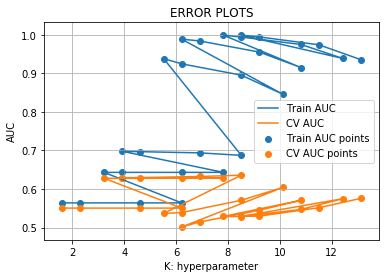

In [69]:
from sklearn.tree import DecisionTreeClassifier

import math




from sklearn.metrics import roc_auc_score

depth = [1, 5, 10, 50, 100, 500, 1000]
min_s = [5, 10,100, 500]
train_auc = []
cv_auc = []
d = []
m_s = []
logs = []
for i in tqdm(depth):
    for j in tqdm(min_s):
        dt = DecisionTreeClassifier(max_depth = i,min_samples_split = j)
        dt.fit(Xtrain1,Y_train)
        y_train_pred = dt.predict_proba(Xtrain1)[:,1]
        y_cv_pred = dt.predict_proba(Xcv1)[:,1]
        train_auc.append(roc_auc_score(Y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv,y_cv_pred))
        b=math.log(i*j)
        logs.append(b)
        m_s.append(j)
        d.append(i)
        
plt.plot(logs, train_auc, label='Train AUC') 
plt.plot(logs, cv_auc, label='CV AUC') 
plt.scatter(logs, train_auc, label='Train AUC points') 
plt.scatter(logs, cv_auc, label='CV AUC points') 
plt.legend() 
plt.xlabel("K: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid() 
plt.show()


In [70]:
train_aucset1 = np.array(train_auc)[:]
cv_aucset1 = np.array(cv_auc)[:] # May have to use copy function (ar2 = ar1.copy())
m_sset1 = np.array(m_s)[:]
dset1 = np.array(d)[:]
type(train_aucset1)

numpy.ndarray

In [71]:
heatmap1 = pd.pivot(m_sset1,dset1,cv_aucset1)

In [72]:
heatmap1.head()

1         5         10        50        100       500       1000
5    0.550472  0.627870  0.629232  0.536739  0.501571  0.528923  0.529034
10   0.550472  0.627585  0.629635  0.538852  0.514337  0.528489  0.529656
100  0.550472  0.627972  0.632398  0.570765  0.544861  0.547007  0.551466
500  0.550472  0.627972  0.635736  0.604218  0.570693  0.574784  0.575630

In [73]:
heatmap1.shape

(4, 7)

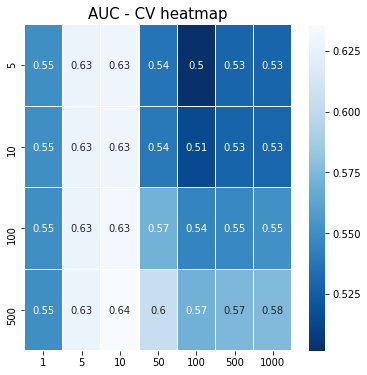

In [74]:
plt.figure(figsize = (6,6))
plt.xlabel('Depth',size = 13)
plt.ylabel('Minimum Samples Split',size = 13)
plt.title("AUC - CV heatmap",size = 15)
sns.heatmap(heatmap1,linewidths = 0.1,cmap = 'Blues_r',annot = True)

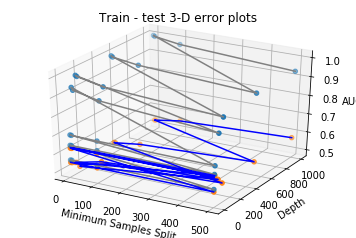

In [75]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(m_s, d, train_auc, 'gray')
ax.plot3D(m_s,d,cv_auc,'blue')
ax.set_xlabel("Minimum Samples Split")
ax.set_ylabel("Depth")
ax.set_zlabel("AUC")
ax.set_title("Train - test 3-D error plots")
ax.scatter3D(m_s,d,train_auc,cmap = 'hsv')
ax.scatter3D(m_s,d,cv_auc)


plt.show()

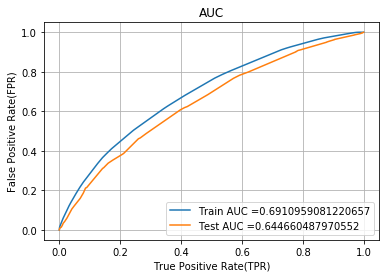

In [55]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.svm import SVC


dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 10,min_samples_split = 500)
dt.fit(Xtrain1, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = dt.predict_proba(Xtrain1)[:,1]

y_test_pred = dt.predict_proba(Xtest1)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [60]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
import graphviz
#from sklearn import tree
from graphviz import Source

In [57]:
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 2)
dt.fit(Xtrain1, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
dot_data = export_graphviz(dt,filled = True,rounded = True,class_names = ['0','1'],feature_names = bow_features,out_file = None)
#graph = graph_from_dot_data(dot_data) 
#graph.write_png('tree1.png') 
graph = graphviz.Source(dot_data)
graph.render("Tree for BOW",view = True)

'Tree for BOW.pdf'

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3913637036266039 for threshold 0.852
[[ 4826  3279]
 [15568 29856]]
the maximum value of tpr*(1-fpr) 0.3913637036266039 for threshold 0.852


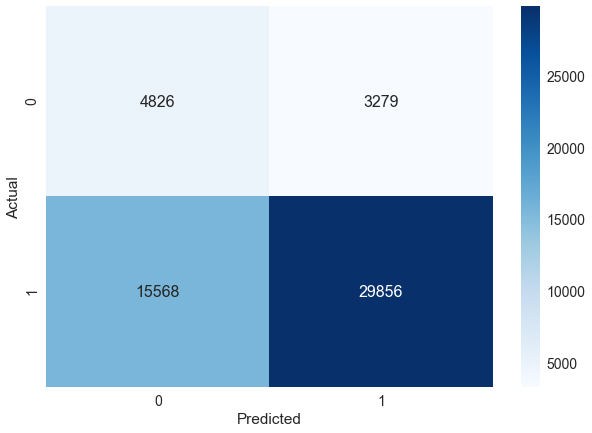

In [77]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


import seaborn as sn
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3560117042592115 for threshold 0.852
[[ 2714  2249]
 [ 9760 18051]]
the maximum value of tpr*(1-fpr) 0.3560117042592115 for threshold 0.852


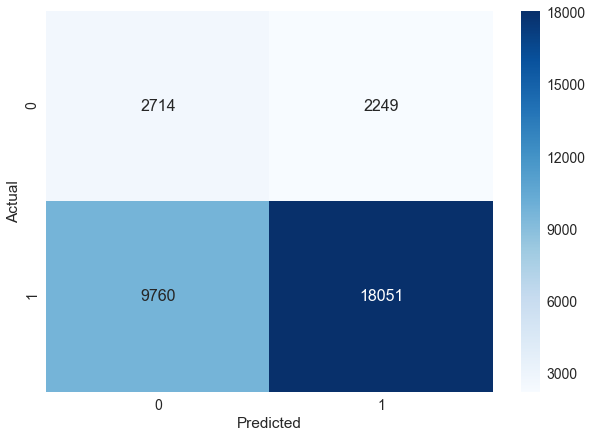

In [78]:
def predicttest(proba, threshould, fpr, tpr):
    
   # t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", threshould)
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

t=0.852
print("Test confusion matrix")
print(confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr)))
data = confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

In [79]:
false_positives = np.logical_and(Y_test != y_test_pred, y_test_pred == 1)
y_fp = list(false_positives)

In [80]:
Y_test[:10]
        

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [81]:
y_test_pred[:10]

array([0.94207252, 0.85355056, 0.87718531, 0.75777296, 0.72481572,
       0.89040865, 0.85355056, 0.85355056, 0.89473684, 0.90449438])

In [83]:
y_fp = [1 if i>0.852 else 0 for i in y_test_pred]

In [84]:
y_fp[:10]

[1, 1, 1, 0, 0, 1, 1, 1, 1, 1]

In [85]:
y_test_fp = list(Y_test)

In [86]:
indexes = []
count = 0

for i in range(len(y_test_pred)):
    if (y_test_fp[i]!=y_fp[i] and y_fp[i]==1):
        indexes.append(i)
        count+=1
    else:
        count+=1
    

In [87]:
len(indexes)

2249

#### As we can see, the list indexes has all the indexes of the datapoints in Xtest1 that were classified as FN. This number also matches with the one in the confusion matrix diagram

In [89]:
#5 of all the FP's
dffp1 = X_test.iloc[indexes,:]
dffp1.head()

Unnamed: 0       id                        teacher_id school_state  \
2        55822  p181350  cc01333f1d00e24d0b2b96e90d6f9336           WI   
6       114709  p237325  aa43517db00870c1ca4012df882f8e29           NC   
10      122744  p095539  f175d43a77abf4c3e6ed059b25ef79bc           MS   
38      118849  p244856  c3b43450dde8f7a320ede039620e20a2           IL   
59      126299  p045963  0d7b3cd172c5b19f83a0ed303f46b729           AR   

   project_submitted_datetime  \
2         2016-11-22 18:05:38   
6         2016-06-23 18:06:00   
10        2016-12-29 22:58:06   
38        2017-03-14 19:33:39   
59        2016-08-13 01:11:38   

                                      project_essay_1  \
2   I am very fortunate to teach the most amazing ...   
6   Help me in creating an inviting and caring cla...   
10  I am a first grade teacher to important little...   
38  First grade is such a huge year for so many st...   
59  With the upcoming school year, I am fortunate ...   

                                      project_essay_2 project_essay_3  \
2   Research shows that students learn best by doi...             NaN   
6   Students will benefit from a horseshoe table. ...             NaN   
10  First graders are so energetic and curious.  H...             NaN   
38  If my project is fully funded, my students wil...             NaN   
59  As a new year is beginning, students are back ...             NaN   

   project_essay_4                           project_resource_summary  \
2              NaN  My students need hands-on math materials to bu...   
6              NaN  My students need a horseshoe table to ensure s...   
10             NaN  My students need fun and engaging morning acti...   
38             NaN  My students need hands-on science stations to ...   
59             NaN  My students need zuma activity chairs for more...   

    teacher_number_of_previously_posted_projects  \
2                                              5   
6                                              4   
10                                             7   
38                                             3   
59                                            30   

                  clean_categories                 clean_subcategories  \
2                     Math_Science                         Mathematics   
6   Literacy_Language Math_Science      Literature_Writing Mathematics   
10  Literacy_Language Math_Science                Literacy Mathematics   
38                    Math_Science                     AppliedSciences   
59                   Health_Sports  Health_Wellness NutritionEducation   

                                                essay  \
2   i fortunate teach amazing kindergarten student...   
6   help creating inviting caring classroom i woul...   
10  i first grade teacher important little humans ...   
38  first grade huge year many students they makin...   
59  with upcoming school year i fortunate enough t...   

                                project_title project_grade_category  \
2                   motivating math materials                 prek_2   
6                            a community born                 prek_2   
10                     learn play first grade                 prek_2   
38                   jump start our stem tubs                 prek_2   
59  monitoring healthy choices staying target                    3_5   

   teacher_prefix   price  quantity  
2              ms   53.50        77  
6             mrs  349.00         1  
10            mrs  339.47        28  
38             ms  579.46         7  
59            mrs  349.25         4

In [90]:

x_test_cloud = list(X_test.iloc[indexes,13])


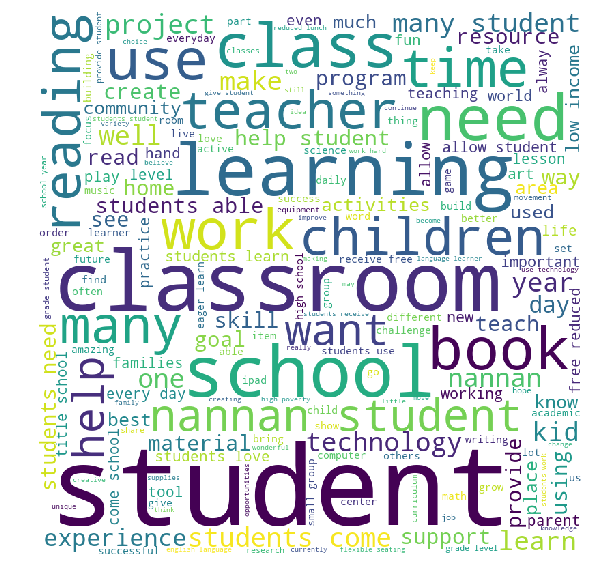

In [91]:

from wordcloud import WordCloud
strr = (" ").join(x_test_cloud)
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [92]:
df1 = pd.DataFrame(dffp1['price'])

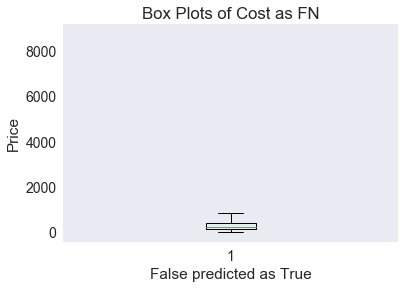

In [93]:
plt.boxplot(df1.values)
plt.title('Box Plots of Cost as FN')
plt.xlabel('False predicted as True')
plt.ylabel('Price')
plt.grid()
plt.show()


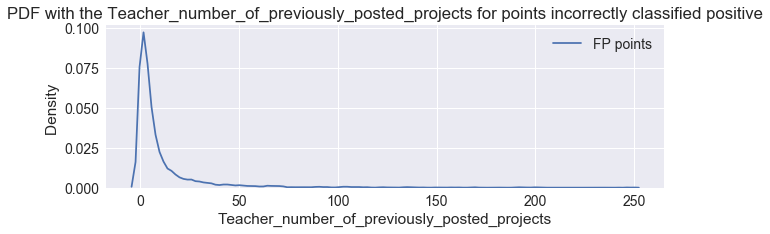

In [94]:
df11 =  pd.DataFrame(dffp1['teacher_number_of_previously_posted_projects'])

plt.figure(figsize=(10,3))
sns.distplot(df11.values, hist=False, label="FP points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for points incorrectly classified positive')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Density ')
plt.legend()
plt.show()

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [63]:
X_train_final_set_two = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,grade_cat_one_hot_train,text_tfidf_train,title_tfidf_train,X_train_price_standard,X_train_project_standard))
Xtrain2 = X_train_final_set_two.tocsr()
X_test_final_set_two = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,grade_cat_one_hot_test,text_tfidf_test,title_tfidf_test,X_test_price_standard,X_test_project_standard))
Xtest2 = X_test_final_set_two.tocsr()
X_cv_final_set_two = hstack((categories_one_hot_tcv,sub_categories_one_hot_tcv,school_state_one_hot_cv,teacher_prefix_one_hot_cv,grade_cat_one_hot_cv,text_tfidf_cv,title_tfidf_cv,X_cv_price_standard,X_cv_project_standard))
Xcv2 = X_cv_final_set_two.tocsr()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [50:25<00:00, 656.03s/it]


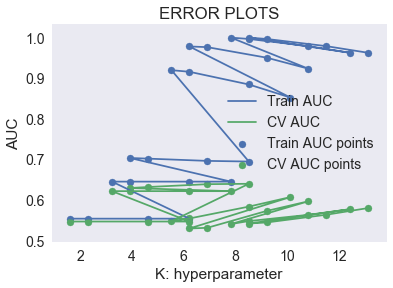

In [96]:
depth = [1, 5, 10, 50, 100, 500, 1000]
min_s = [5, 10,100, 500]
train_auc = []
cv_auc = []
d = []
m_s = []
logs = []
for i in tqdm(depth):
    for j in tqdm(min_s):
        dt = DecisionTreeClassifier(criterion = 'gini',max_depth = i,min_samples_split = j)
        dt.fit(Xtrain2,Y_train)
        y_train_pred = dt.predict_proba(Xtrain2)[:,1]
        y_cv_pred = dt.predict_proba(Xcv2)[:,1]
        train_auc.append(roc_auc_score(Y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv,y_cv_pred))
        b=math.log(i*j)
        logs.append(b)
        m_s.append(j)
        d.append(i)
        
plt.plot(logs, train_auc, label='Train AUC') 
plt.plot(logs, cv_auc, label='CV AUC') 
plt.scatter(logs, train_auc, label='Train AUC points') 
plt.scatter(logs, cv_auc, label='CV AUC points') 
plt.legend() 
plt.xlabel("K: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid() 
plt.show()


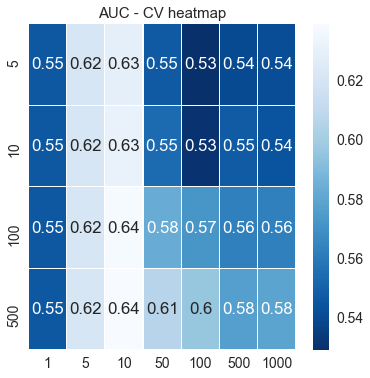

In [97]:
train_aucset2 = np.array(train_auc)[:]
cv_aucset2 = np.array(cv_auc)[:] # May have to use copy function (ar2 = ar1.copy())
m_sset2 = np.array(m_s)[:]
dset2 = np.array(d)[:]
type(train_aucset1)

heatmap2 = pd.pivot(m_sset2,dset2,cv_aucset2)

plt.figure(figsize = (6,6))
plt.title("AUC - CV heatmap",size = 15)
plt.xlabel('Depth',size = 13)
plt.ylabel('Minimum Samples Split',size = 13)

sns.heatmap(heatmap2,linewidths = 0.1,cmap = 'Blues_r',annot = True)

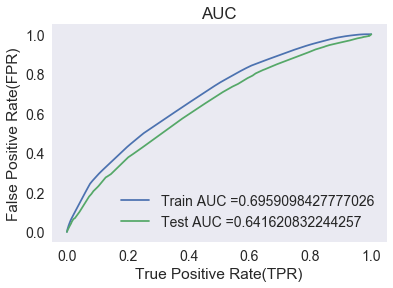

In [98]:
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 10,min_samples_split = 100)
dt.fit(Xtrain2, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = dt.predict_proba(Xtrain2)[:,1]    
y_test_pred = dt.predict_proba(Xtest2)[:,1]

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(Y_train, y_train_pred)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [64]:
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 2)
dt.fit(Xtrain2, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
dot_data = export_graphviz(dt,filled = True,rounded = True,class_names = ['0','1'],feature_names = tfidf_features,out_file = None)
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree2tfidf.png') 

True

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4140207808790012 for threshold 0.848
[[ 5388  2717]
 [17134 28290]]
the maximum value of tpr*(1-fpr) 0.4140207808790012 for threshold 0.848


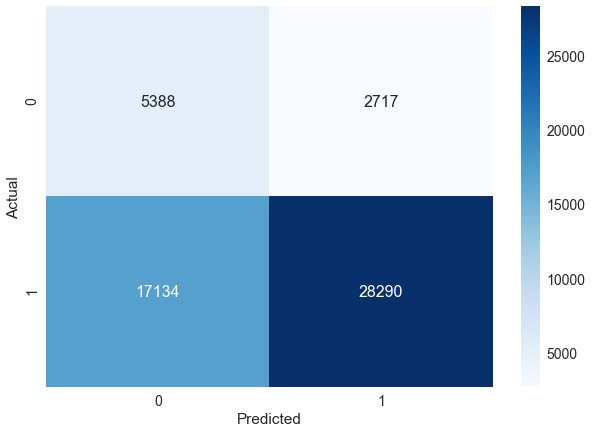

In [99]:
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds2, train_fpr2, train_tpr2)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds2, train_fpr2, train_tpr2))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.37061201943318023 for threshold 0.848
[[ 3219  1744]
 [12015 15796]]
the maximum value of tpr*(1-fpr) 0.37061201943318023 for threshold 0.848


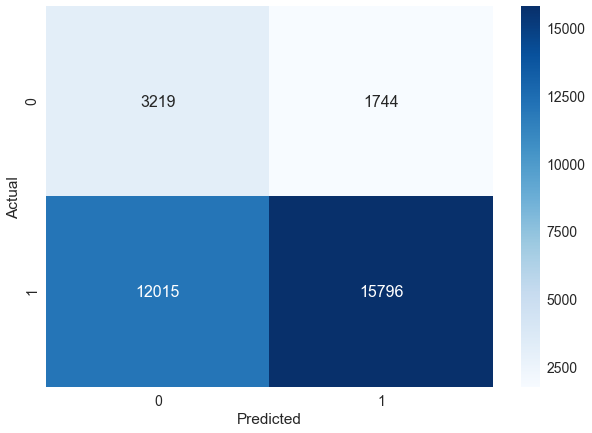

In [100]:
t=0.848
print("Test confusion matrix")
print(confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr2, test_tpr2)))
data = confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr2, test_tpr2))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

In [102]:
y_fp = [1 if i>0.848 else 0 for i in y_test_pred]
y_test_fp = list(Y_test)

indexes = []
count = 0

for i in range(len(y_test_pred)):
    if (y_test_fp[i]!=y_fp[i] and y_fp[i]==1):
        indexes.append(i)
        count+=1
    else:
        count+=1
    

In [103]:
len(indexes)

1744

In [104]:
dffp1 = X_test.iloc[indexes,:]

In [105]:
dffp1.head()

Unnamed: 0       id                        teacher_id school_state  \
6       114709  p237325  aa43517db00870c1ca4012df882f8e29           NC   
34      102717  p251287  1d0e9e1aaeabf3cabcc2a1bed180df4e           GA   
59      126299  p045963  0d7b3cd172c5b19f83a0ed303f46b729           AR   
68       34865  p246835  c703cf1dbeba0dab8e4a2d861e867100           GA   
82       83813  p229403  fdbc8d5812f79ffaeaa8be5a4cd3e046           MS   

   project_submitted_datetime  \
6         2016-06-23 18:06:00   
34        2016-11-08 18:34:20   
59        2016-08-13 01:11:38   
68        2016-07-18 17:43:43   
82        2016-09-01 03:31:32   

                                      project_essay_1  \
6   Help me in creating an inviting and caring cla...   
34  I teach in a low income/ high-poverty school d...   
59  With the upcoming school year, I am fortunate ...   
68  This is my ninth year as a teacher. I taught f...   
82  I have the best job on the planet!  I get to t...   

                                      project_essay_2 project_essay_3  \
6   Students will benefit from a horseshoe table. ...             NaN   
34  A set of iPads would impact our class immensel...             NaN   
59  As a new year is beginning, students are back ...             NaN   
68  The composition notebooks, paper, and pencils ...             NaN   
82  I have a wide range of students with varying s...             NaN   

   project_essay_4                           project_resource_summary  \
6              NaN  My students need a horseshoe table to ensure s...   
34             NaN  My students need technology to personalize the...   
59             NaN  My students need zuma activity chairs for more...   
68             NaN  My students need composition notebooks in orde...   
82             NaN  My students need books in order to make speech...   

    teacher_number_of_previously_posted_projects  \
6                                              4   
34                                             1   
59                                            30   
68                                             3   
82                                             5   

                  clean_categories                 clean_subcategories  \
6   Literacy_Language Math_Science      Literature_Writing Mathematics   
34  Literacy_Language Math_Science                Literacy Mathematics   
59                   Health_Sports  Health_Wellness NutritionEducation   
68  Literacy_Language Math_Science      Literature_Writing Mathematics   
82                    SpecialNeeds                        SpecialNeeds   

                                                essay  \
6   help creating inviting caring classroom i woul...   
34  i teach low income high poverty school distric...   
59  with upcoming school year i fortunate enough t...   
68  this ninth year teacher i taught first grade 7...   
82  i best job planet i get teach students communi...   

                                  project_title project_grade_category  \
6                              a community born                 prek_2   
34                 level up learning technology                 prek_2   
59    monitoring healthy choices staying target                    3_5   
68                            let get organized                    3_5   
82  enhancing speech language skills with books                 prek_2   

   teacher_prefix   price  quantity  
6             mrs  349.00         1  
34             ms  269.99         3  
59            mrs  349.25         4  
68            mrs  107.46        26  
82            mrs  320.80        27

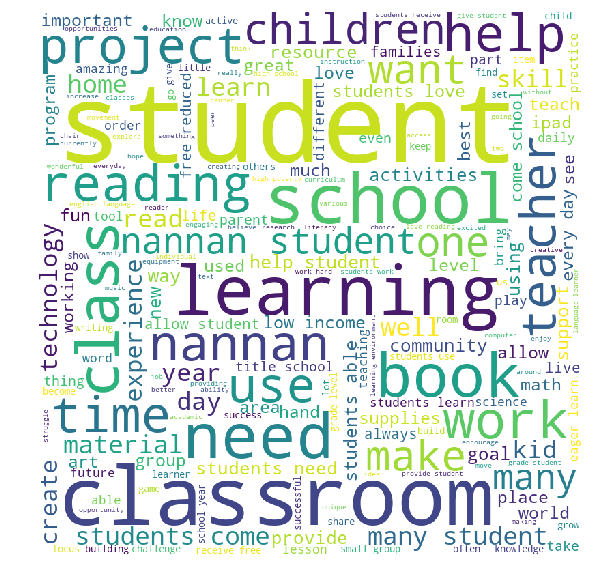

In [106]:
x_test_cloud = list(X_test.iloc[indexes,13])

from wordcloud import WordCloud
strr = (" ").join(x_test_cloud)
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

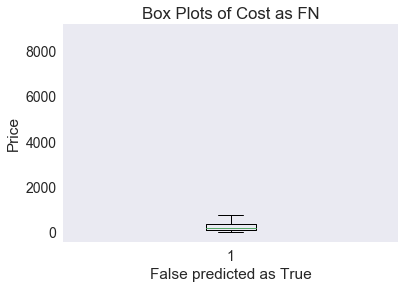

In [107]:
df1 = pd.DataFrame(dffp1['price'])
plt.boxplot(df1.values)
plt.title('Box Plots of Cost as FN')
plt.xlabel('False predicted as True')
plt.ylabel('Price')
plt.grid()
plt.show()


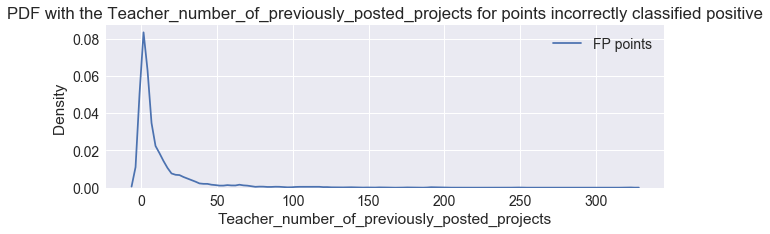

In [108]:
df11 =  pd.DataFrame(dffp1['teacher_number_of_previously_posted_projects'])

plt.figure(figsize=(10,3))
sns.distplot(df11.values, hist=False, label="FP points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for points incorrectly classified positive')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Density ')
plt.legend()
plt.show()

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [109]:
X_train_final_set_three = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,grade_cat_one_hot_train,avg_w2v_vectors_train,avg_w2v_proj_train,X_train_price_standard,X_train_project_standard))
Xtrain3 = X_train_final_set_three.tocsr()
X_test_final_set_three = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,grade_cat_one_hot_test,avg_w2v_vectors_test,avg_w2v_proj_test,X_test_price_standard,X_test_project_standard))
Xtest3 = X_test_final_set_three.tocsr()
X_cv_final_set_three = hstack((categories_one_hot_tcv,sub_categories_one_hot_tcv,school_state_one_hot_cv,teacher_prefix_one_hot_cv,grade_cat_one_hot_cv,avg_w2v_vectors_cv,avg_w2v_proj_cv,X_cv_price_standard,X_cv_project_standard))
Xcv3 = X_cv_final_set_three.tocsr()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [2:11:49<00:00, 1397.30s/it]


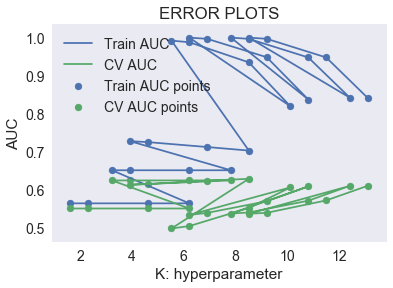

In [110]:
depth = [1, 5, 10, 50, 100, 500, 1000]
min_s = [5, 10,100, 500]
train_auc = []
cv_auc = []
d = []
m_s = []
logs = []
for i in tqdm(depth):
    for j in tqdm(min_s):
        dt = DecisionTreeClassifier(criterion = 'gini',max_depth = i,min_samples_split = j)
        dt.fit(Xtrain3,Y_train)
        y_train_pred = dt.predict_proba(Xtrain3)[:,1]
        y_cv_pred = dt.predict_proba(Xcv3)[:,1]
        train_auc.append(roc_auc_score(Y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv,y_cv_pred))
        b=math.log(i*j)
        logs.append(b)
        m_s.append(j)
        d.append(i)
        
plt.plot(logs, train_auc, label='Train AUC') 
plt.plot(logs, cv_auc, label='CV AUC') 
plt.scatter(logs, train_auc, label='Train AUC points') 
plt.scatter(logs, cv_auc, label='CV AUC points') 
plt.legend() 
plt.xlabel("K: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid() 
plt.show()


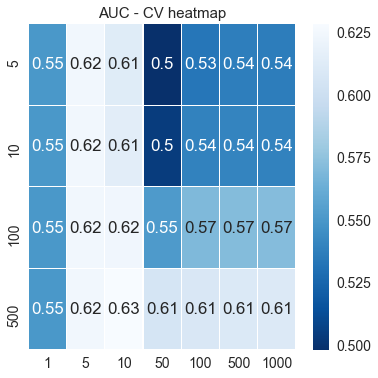

In [111]:
train_aucset3= np.array(train_auc)[:]
cv_aucset3 = np.array(cv_auc)[:] # May have to use copy function (ar2 = ar1.copy())
m_sset3 = np.array(m_s)[:]
dset3 = np.array(d)[:]
type(train_aucset1)

heatmap2 = pd.pivot(m_sset3,dset3,cv_aucset3)

plt.figure(figsize = (6,6))
plt.title("AUC - CV heatmap",size = 15)
plt.xlabel('Depth',size = 13)
plt.ylabel('Minimum Samples Split',size = 13)

sns.heatmap(heatmap2,linewidths = 0.1,cmap = 'Blues_r',annot = True)

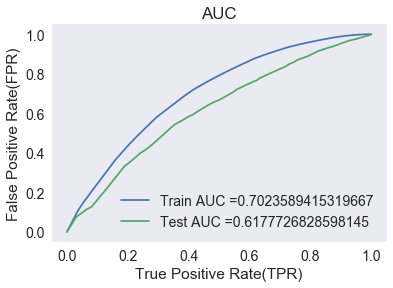

In [112]:
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 10,min_samples_split = 500)
dt.fit(Xtrain3, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = dt.predict_proba(Xtrain3)[:,1]    
y_test_pred = dt.predict_proba(Xtest3)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.42239102011530155 for threshold 0.867
[[ 4905  3200]
 [13720 31704]]
the maximum value of tpr*(1-fpr) 0.42239102011530155 for threshold 0.867


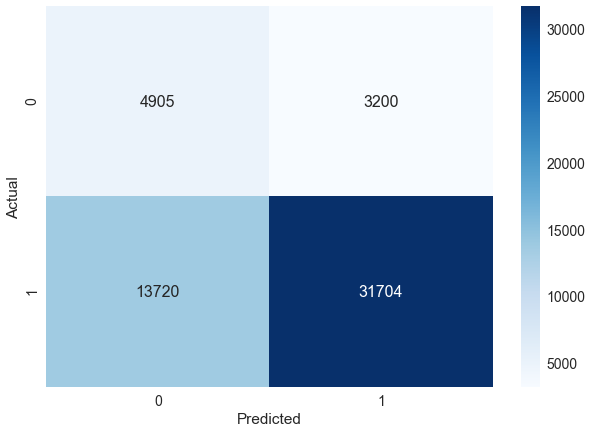

In [113]:
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3511113446581036 for threshold 0.867
[[ 2803  2160]
 [10717 17094]]
the maximum value of tpr*(1-fpr) 0.3511113446581036 for threshold 0.867


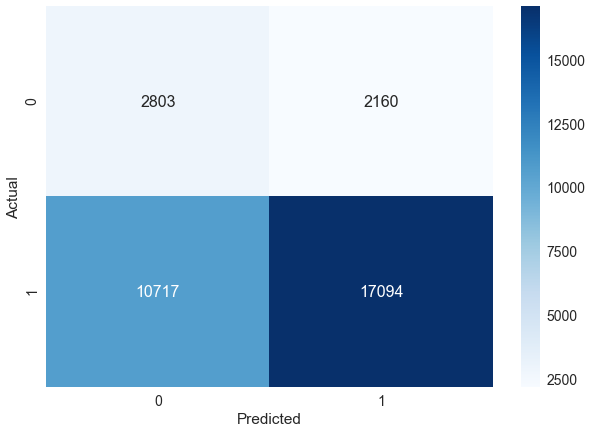

In [114]:
t = 0.867
print("Test confusion matrix")
print(confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr)))
data = confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

In [115]:
y_fp = [1 if i>0.867 else 0 for i in y_test_pred]
y_test_fp = list(Y_test)

indexes = []
count = 0

for i in range(len(y_test_pred)):
    if (y_test_fp[i]!=y_fp[i] and y_fp[i]==1):
        indexes.append(i)
        count+=1
    else:
        count+=1
    

In [116]:
len(indexes)

2160

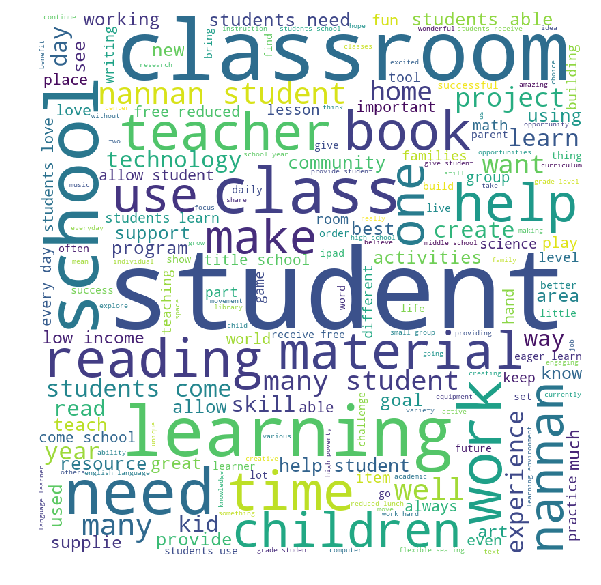

In [117]:
x_test_cloud = list(X_test.iloc[indexes,13])

from wordcloud import WordCloud
strr = (" ").join(x_test_cloud)
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

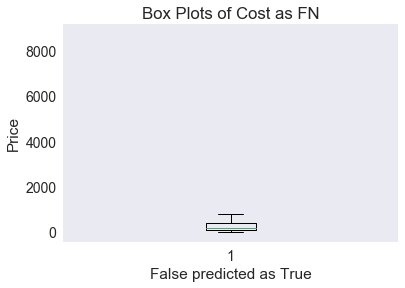

In [118]:
dffp1 = X_test.iloc[indexes,:]
df1 = pd.DataFrame(dffp1['price'])
plt.boxplot(df1.values)
plt.title('Box Plots of Cost as FN')
plt.xlabel('False predicted as True')
plt.ylabel('Price')
plt.grid()
plt.show()


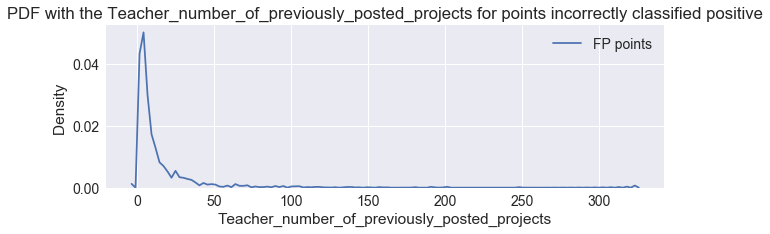

In [119]:
df11 =  pd.DataFrame(dffp1['teacher_number_of_previously_posted_projects'])

plt.figure(figsize=(10,3))
sns.distplot(df11.values, hist=False, label="FP points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for points incorrectly classified positive')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Density ')
plt.legend()
plt.show()

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [120]:
X_train_final_set_four = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,grade_cat_one_hot_train,tfidf_w2v_vectors_train,tfidf_w2v_proj_train,X_train_price_standard,X_train_project_standard))
Xtrain4 = X_train_final_set_four.tocsr()
X_test_final_set_four = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,grade_cat_one_hot_test,tfidf_w2v_vectors_test,tfidf_w2v_proj_test,X_test_price_standard,X_test_project_standard))
Xtest4 = X_test_final_set_four.tocsr()
X_cv_final_set_four = hstack((categories_one_hot_tcv,sub_categories_one_hot_tcv,school_state_one_hot_cv,teacher_prefix_one_hot_cv,grade_cat_one_hot_cv,tfidf_w2v_vectors_cv,tfidf_w2v_proj_cv,X_cv_price_standard,X_cv_project_standard))
Xcv4 = X_cv_final_set_four.tocsr()

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [1:33:42<00:00, 1015.91s/it]


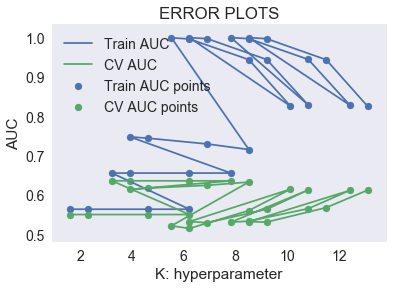

In [121]:
depth = [1, 5, 10, 50, 100, 500, 1000]
min_s = [5, 10,100, 500]
train_auc = []
cv_auc = []
d = []
m_s = []
logs = []
for i in tqdm(depth):
    for j in tqdm(min_s):
        dt = DecisionTreeClassifier(criterion = 'gini',max_depth = i,min_samples_split = j)
        dt.fit(Xtrain4,Y_train)
        y_train_pred = dt.predict_proba(Xtrain4)[:,1]
        y_cv_pred = dt.predict_proba(Xcv4)[:,1]
        train_auc.append(roc_auc_score(Y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv,y_cv_pred))
        b=math.log(i*j)
        logs.append(b)
        m_s.append(j)
        d.append(i)
        
plt.plot(logs, train_auc, label='Train AUC') 
plt.plot(logs, cv_auc, label='CV AUC') 
plt.scatter(logs, train_auc, label='Train AUC points') 
plt.scatter(logs, cv_auc, label='CV AUC points') 
plt.legend() 
plt.xlabel("K: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid() 
plt.show()


#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

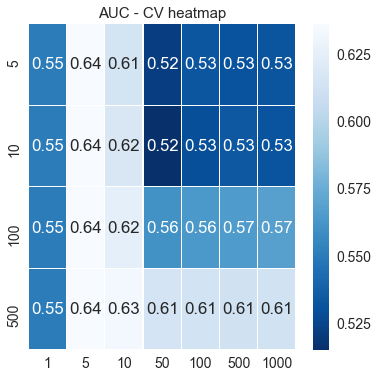

In [124]:
train_aucset4= np.array(train_auc)[:]
cv_aucset4 = np.array(cv_auc)[:] # May have to use copy function (ar2 = ar1.copy())
m_sset4 = np.array(m_s)[:]
dset4 = np.array(d)[:]


heatmap4 = pd.pivot(m_sset4,dset4,cv_aucset4)

plt.figure(figsize = (6,6))
plt.title("AUC - CV heatmap",size = 15)
plt.xlabel('Depth',size = 13)
plt.ylabel('Minimum Samples Split',size = 13)

sns.heatmap(heatmap4,linewidths = 0.1,cmap = 'Blues_r',annot = True)

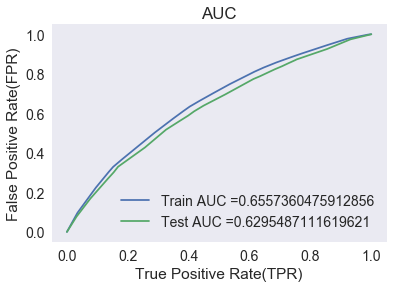

In [125]:
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 5,min_samples_split = 500)
dt.fit(Xtrain4, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = dt.predict_proba(Xtrain4)[:,1]    
y_test_pred = dt.predict_proba(Xtest4)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3782247096328807 for threshold 0.859
[[ 4836  3269]
 [16630 28794]]
the maximum value of tpr*(1-fpr) 0.3782247096328807 for threshold 0.859


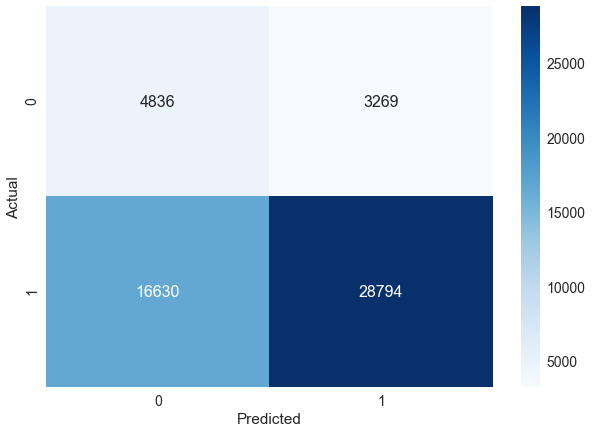

In [126]:
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.35505504387133807 for threshold 0.859
[[ 2988  1975]
 [11463 16348]]
the maximum value of tpr*(1-fpr) 0.35505504387133807 for threshold 0.859


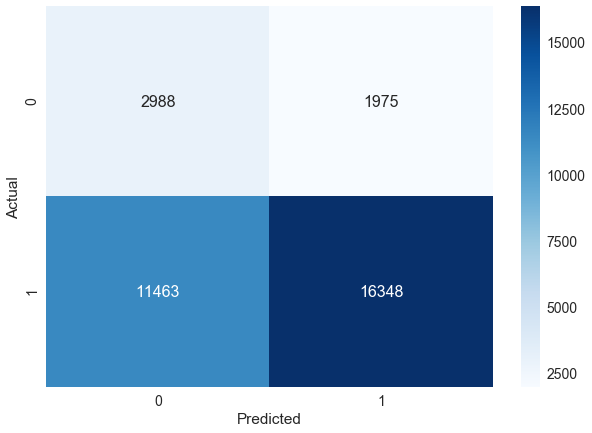

In [127]:
t = 0.859
print("Test confusion matrix")
print(confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr)))
data = confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

In [128]:
y_fp = [1 if i>0.859 else 0 for i in y_test_pred]
y_test_fp = list(Y_test)

indexes = []
count = 0

for i in range(len(y_test_pred)):
    if (y_test_fp[i]!=y_fp[i] and y_fp[i]==1):
        indexes.append(i)
        count+=1
    else:
        count+=1
    

In [129]:
len(indexes)

1975

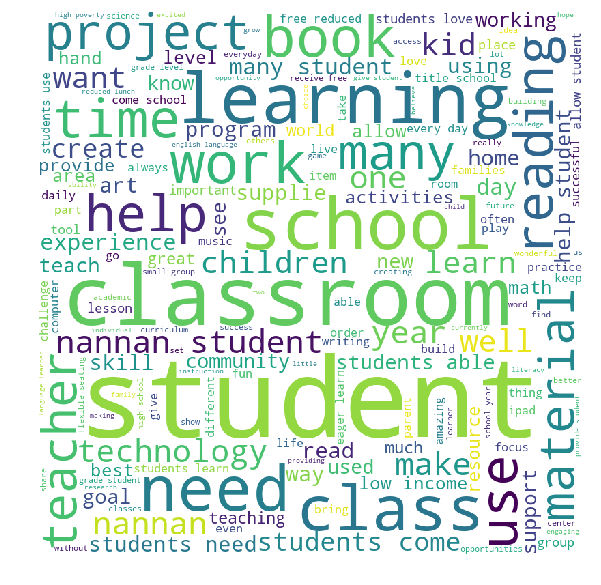

In [130]:
x_test_cloud = list(X_test.iloc[indexes,13])

from wordcloud import WordCloud
strr = (" ").join(x_test_cloud)
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

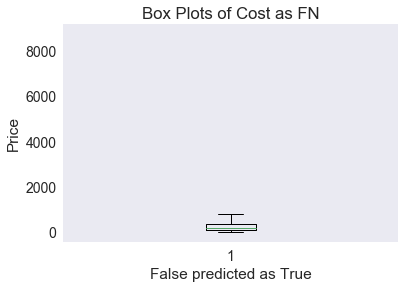

In [131]:
dffp1 = X_test.iloc[indexes,:]
df1 = pd.DataFrame(dffp1['price'])
plt.boxplot(df1.values)
plt.title('Box Plots of Cost as FN')
plt.xlabel('False predicted as True')
plt.ylabel('Price')
plt.grid()
plt.show()


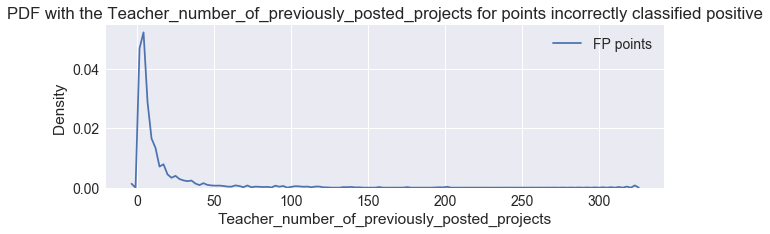

In [132]:
df11 =  pd.DataFrame(dffp1['teacher_number_of_previously_posted_projects'])

plt.figure(figsize=(10,3))
sns.distplot(df11.values, hist=False, label="FP points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for points incorrectly classified positive')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Density ')
plt.legend()
plt.show()

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [58]:
from sklearn.tree import DecisionTreeClassifier
X_train_final_set_two = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,grade_cat_one_hot_train,text_tfidf_train,title_tfidf_train,X_train_price_standard,X_train_project_standard))
Xtrain2 = X_train_final_set_two.tocsr()
X_test_final_set_two = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,grade_cat_one_hot_test,text_tfidf_test,title_tfidf_test,X_test_price_standard,X_test_project_standard))
Xtest2 = X_test_final_set_two.tocsr()
X_cv_final_set_two = hstack((categories_one_hot_tcv,sub_categories_one_hot_tcv,school_state_one_hot_cv,teacher_prefix_one_hot_cv,grade_cat_one_hot_cv,text_tfidf_cv,title_tfidf_cv,X_cv_price_standard,X_cv_project_standard))
Xcv2 = X_cv_final_set_two.tocsr()

In [59]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain2,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
importances = dt.feature_importances_

In [61]:
indices = np.argsort(importances)[::-1]

indices = indices[0:5000]

Xtrfinal = Xtrain2[:,indices]

Xtrfinal.shape

Xtrfinal.shape


In [ ]:
Xtefinal = Xtest2[:,indices]
Xcvfinal = Xcv2[:,indices]

In [69]:
Xcvfinal.shape

(22942, 5000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [43:27<00:00, 551.54s/it]


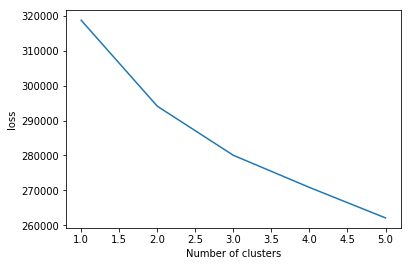

In [71]:
from sklearn.cluster import KMeans
loss = []
for k in tqdm(range(1,6)):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Xtrfinal)
    loss.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1,6),loss)
plt.xlabel("Number of clusters")
plt.ylabel("loss")
plt.show()

#### From domain knowledge, we know that the right K is two, hence we choose k = 2

In [66]:
depth = [1, 5, 10, 50, 100, 500, 1000]
min_s = [5, 10,100, 500]
train_auc = []
cv_auc = []
d = []
m_s = []
logs = []
for i in tqdm(depth):
    for j in tqdm(min_s):
        dt = DecisionTreeClassifier(criterion = 'gini',max_depth = i,min_samples_split = j)
        dt.fit(Xtrfinal,Y_train)
        y_train_pred = dt.predict_proba(Xtrfinal)[:,1]
        y_cv_pred = dt.predict_proba(Xcvfinal)[:,1]
        train_auc.append(roc_auc_score(Y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv,y_cv_pred))
        b=math.log(i*j)
        logs.append(b)
        m_s.append(j)
        d.append(i)
        
plt.plot(logs, train_auc, label='Train AUC') 
plt.plot(logs, cv_auc, label='CV AUC') 
plt.scatter(logs, train_auc, label='Train AUC points') 
plt.scatter(logs, cv_auc, label='CV AUC points') 
plt.legend() 
plt.xlabel("K: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid() 
plt.show()


  0%|                                                                                                                          | 0/4 [00:00<?, ?it/s]


NameError: name 'roc_auc_score' is not defined

In [ ]:
train_aucset2 = np.array(train_auc)[:]
cv_aucset2 = np.array(cv_auc)[:] # May have to use copy function (ar2 = ar1.copy())
m_sset2 = np.array(m_s)[:]
dset2 = np.array(d)[:]
type(train_aucset1)

heatmap2 = pd.pivot(m_sset2,dset2,cv_aucset2)

plt.figure(figsize = (6,6))
plt.title("AUC - CV heatmap",size = 15)
plt.xlabel('Depth',size = 13)
plt.ylabel('Minimum Samples Split',size = 13)

sns.heatmap(heatmap2,linewidths = 0.1,cmap = 'Blues_r',annot = True)

In [ ]:
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 10,min_samples_split = 100)
dt.fit(Xtrfinal, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = dt.predict_proba(Xtrfinal)[:,1]    
y_test_pred = dt.predict_proba(Xtefinal)[:,1]

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(Y_train, y_train_pred)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [ ]:
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds2, train_fpr2, train_tpr2)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds2, train_fpr2, train_tpr2))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


In [ ]:
t=0.853
print("Test confusion matrix")
print(confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr2, test_tpr2)))
data = confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr2, test_tpr2))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

In [ ]:
y_fp = [1 if i>0.848 else 0 for i in y_test_pred]
y_test_fp = list(Y_test)

indexes = []
count = 0

for i in range(len(y_test_pred)):
    if (y_test_fp[i]!=y_fp[i] and y_fp[i]==1):
        indexes.append(i)
        count+=1
    else:
        count+=1
    

In [ ]:
len(indexes)

In [ ]:
dffp1 = X_test.iloc[indexes,:]

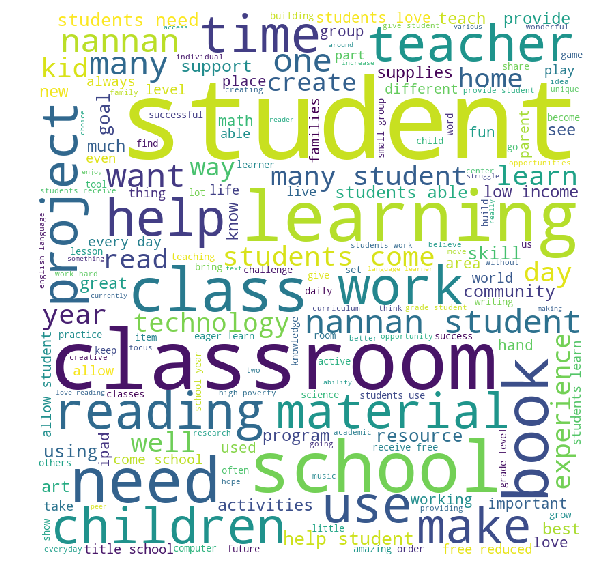

In [149]:
x_test_cloud = list(X_test.iloc[indexes,13])

from wordcloud import WordCloud
strr = (" ").join(x_test_cloud)
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

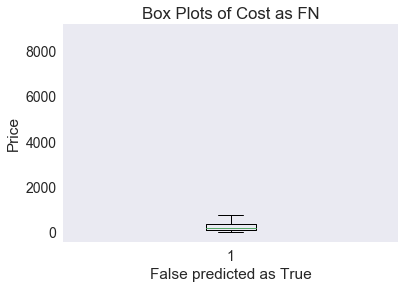

In [150]:
df1 = pd.DataFrame(dffp1['price'])
plt.boxplot(df1.values)
plt.title('Box Plots of Cost as FN')
plt.xlabel('False predicted as True')
plt.ylabel('Price')
plt.grid()
plt.show()


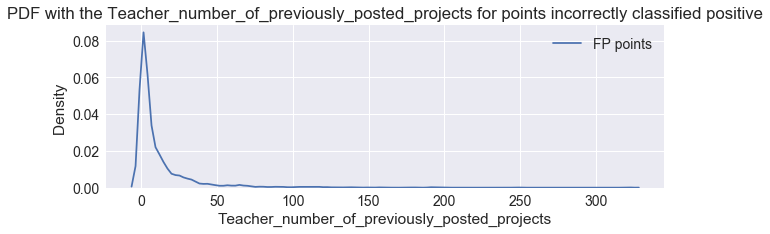

In [151]:
df11 =  pd.DataFrame(dffp1['teacher_number_of_previously_posted_projects'])

plt.figure(figsize=(10,3))
sns.distplot(df11.values, hist=False, label="FP points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for points incorrectly classified positive')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Density ')
plt.legend()
plt.show()

<h1>3. Conclusion</h1>

In [152]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Method", "AUC - Test data"]

x.add_row(["BOW",  0.64])
x.add_row(["TFIDF",  0.64])
x.add_row(["W2V",  0.61])
x.add_row(["W2V-TFIDF",  0.62])
x.add_row(["SET - 5",  0.64])

print(x)

+-----------+-----------------+
|   Method  | AUC - Test data |
+-----------+-----------------+
|    BOW    |       0.64      |
|   TFIDF   |       0.64      |
|    W2V    |       0.61      |
| W2V-TFIDF |       0.62      |
|  SET - 5  |       0.64      |
+-----------+-----------------+
